In [1]:
import pandas as pd 
from fbprophet import Prophet
import numpy as np 
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('../data/prophet/example_wp_log_peyton_manning.csv')

In [44]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [45]:
df.ds = pd.to_datetime(df.ds).apply(lambda x: int(x.timestamp() / 24 / 60 / 60 + 0.1) - 13857)
playoffs['ds'] = pd.to_datetime(playoffs['ds']).apply(lambda x: int(x.timestamp() / 24 / 60 / 60 + 0.1) - 13857)
superbowls['ds'] = pd.to_datetime(superbowls['ds']).apply(lambda x: int(x.timestamp() / 24 / 60 / 60 + 0.1) - 13857)

In [46]:
data = np.zeros((2964, 2))
data[df.ds, 0] = df.y
data[playoffs.ds[:-2] - 1, 1] = 1
data[[790 - 1, 2246 - 1], 1] = 1

In [47]:
cur = -1
for i in range(data.shape[0]):
    if data[i, 0] > 0:
        cur = data[i, 0]
    else:
        data[i, 0] = cur

In [37]:
data.shape

(2964, 2)

In [48]:
data_dir = '../data/prophet/'
if not os.path.exists(data_dir):
    os.mkdir(data_dir)
np.save(data_dir + 'with_holiday', data)

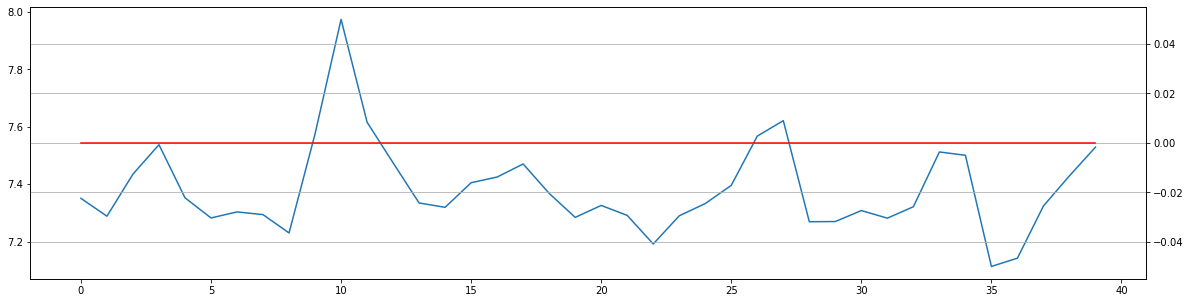

In [39]:
st = 2000
en = st + 40

plt.figure(figsize=(20,5))
plt.plot(data[st:en, 0])
plt2 = plt.twinx()
plt2.plot(data[st:en, 1], 'r')
# plt.legend(['y_test', 'gate_forecast', 'feature_forecast'])
plt.grid(True)
plt2.grid(True)

In [25]:
np.corrcoef([data[:, 0], data[:, 1]])

array([[1.        , 0.14577684],
       [0.14577684, 1.        ]])